## TITLE: Home Loan Approval EDA 🏦

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
import warnings 
warnings.filterwarnings('ignore')

In [21]:
data = pd.read_csv('loan_sanction_train.csv')

In [22]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [23]:
#df = data

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


##### There are missing values in the data

In [25]:
## check missing values
pd.DataFrame(round((df.isnull().mean() * 100), 2), columns=["Ratio_of_missing_vals."]) 

,Ratio_of_missing_vals.
Loan_ID,0.00
Gender,2.12
Married,0.49
Dependents,2.44
Education,0.00
Self_Employed,5.21
ApplicantIncome,0.00
CoapplicantIncome,0.00
LoanAmount,3.58
Loan_Amount_Term,2.28


In [26]:
df.duplicated().any()

False

##### There are no duplicate rows

In [27]:
df = df.dropna()
# For this problem, we have opted to drop the rows. You may choose to keep the rows and impute them with mean/median values per your requirement

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


In [12]:
df.describe() # for numerical cols

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


##### Mean income of the applicant : 5403.46
##### Mean income of the Co Applicant : 1621.25
##### Mean Loan amount : 146.41
##### Mean Term of loan : 342

In [13]:
df.describe(exclude="number") # for categorical cols

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


### Exploratory Data Analysis: Univariate Analysis 

##### 1. Applicant Income 

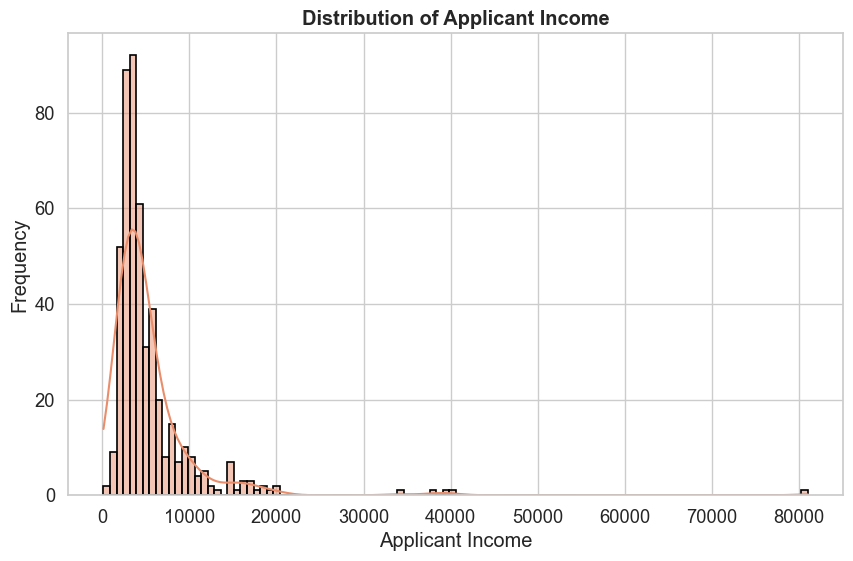

In [51]:
# Plotting the histogram
sns.set(rc={"figure.figsize" : [10,6]}, style="whitegrid", font_scale=1.2)
sns.set_palette("flare") ## pastel

sns.histplot(data=df, x="ApplicantIncome", kde=True, edgecolor="black", linewidth=1.2)

# Customizing the plot
plt.title("Distribution of Applicant Income", weight="bold")
plt.xlabel("Applicant Income")
plt.ylabel("Frequency")

# Display the plot
plt.show()

Based on the provided histogram plot, it is evident that there are outliers in the data, as there are a few data points that deviate significantly from the majority of the values. Most of the income values range from 150 to 10000.

In [30]:
df["ApplicantIncome"].agg(["min", "max"])

min      150
max    81000
Name: ApplicantIncome, dtype: int64

##### 2.Co-applicant Income 

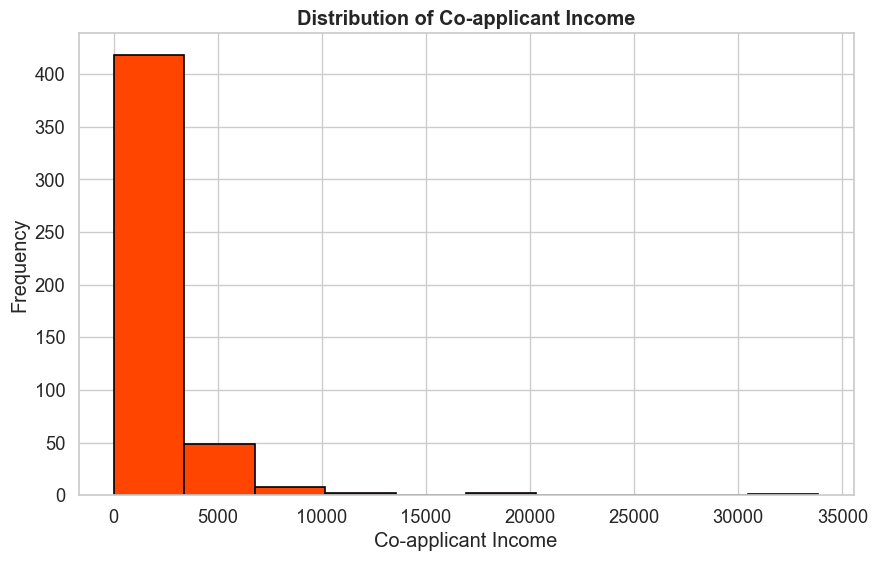

In [68]:
sns.set(rc={"figure.figsize" : [10,6]}, style="whitegrid", font_scale=1.2)

plt.hist(x=df["CoapplicantIncome"], edgecolor="black", linewidth=1.2, color = '#FF4500')

plt.title("Distribution of Co-applicant Income", weight="bold")
plt.xlabel("Co-applicant Income")
plt.ylabel("Frequency")

plt.show()

Most of the coapplicant income values range from 0 to 3000. Additionally, it is evident that there are also outliers present in the data.

##### 3. Loan Amount

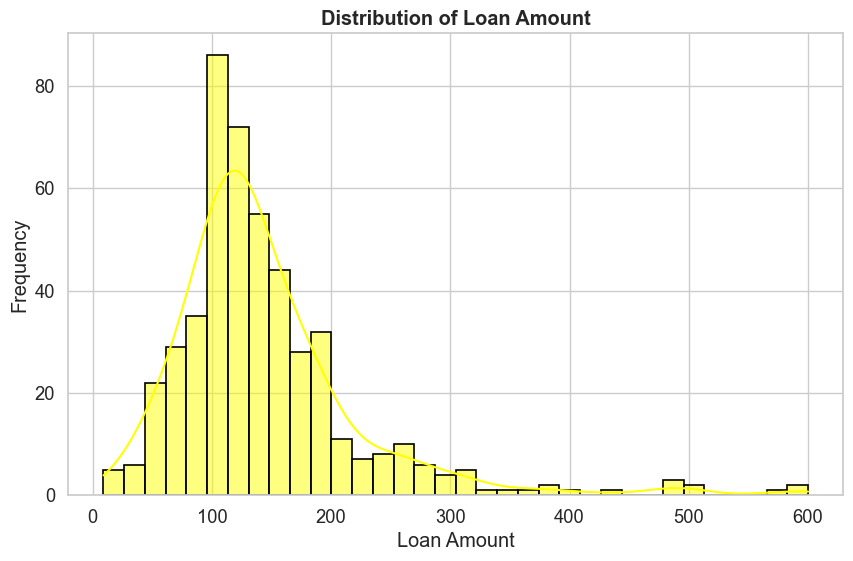

In [67]:
sns.histplot(data=df, x="LoanAmount", kde=True, edgecolor="black", linewidth=1.2, color = 'yellow')

plt.title("Distribution of Loan Amount", weight="bold")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")

plt.show()

Most of the loan amount values range from 9 to 200. This can be observed from the histogram plot.

##### 4. Loan Amount Term

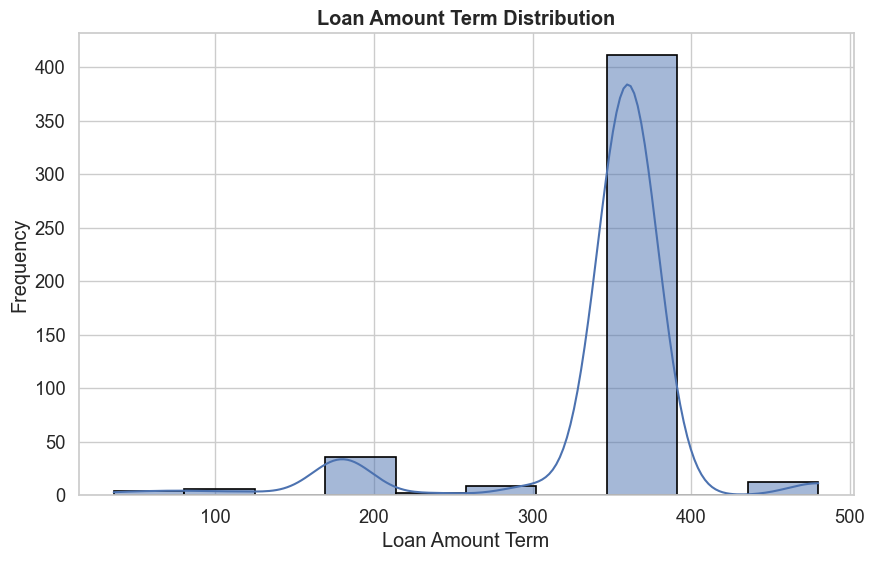

In [55]:
sns.histplot(data=df, x="Loan_Amount_Term", kde=True, edgecolor="black", linewidth=1.2)

plt.title("Loan Amount Term Distribution", weight="bold")  # Set the plot title
plt.xlabel("Loan Amount Term")  # Set the x-axis label
plt.ylabel("Frequency")  # Set the y-axis label

plt.show()

Most loans have a term of 400 months

##### 5. Credit History:

In [56]:
df['Credit_History'] = df['Credit_History'].map({1: "Yes", 0: "No"})

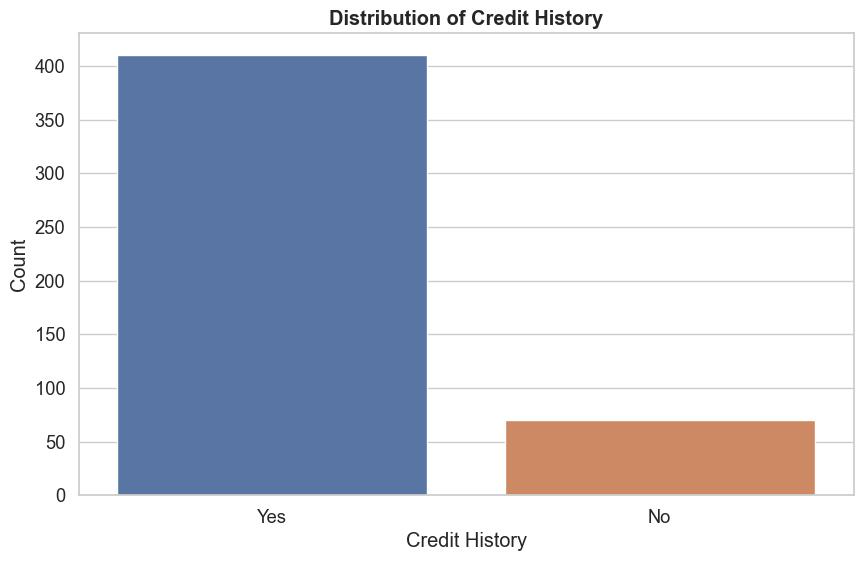

In [57]:
## Create countplot ==> Credit_History
sns.countplot(data=df, x="Credit_History")

plt.xlabel("Credit History")
plt.ylabel("Count")
plt.title("Distribution of Credit History", weight="bold")

plt.show()

Most applicants have a credit history value of Yes (good credit history).

##### 6. Gender: 

In [59]:
Gender_count = df["Gender"].value_counts() 
print(Gender_count)
print("*"*50)

Male      394
Female     86
Name: Gender, dtype: int64
**************************************************


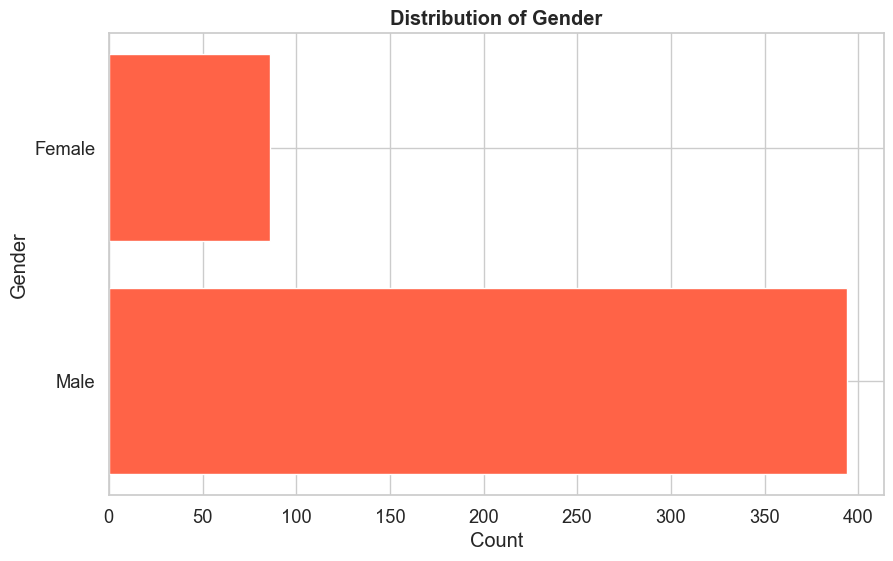

In [69]:
plt.barh(y=Gender_count.index, width=Gender_count.values, color = '#FF6347')

plt.xlabel("Count")
plt.ylabel("Gender")
plt.title("Distribution of Gender", weight="bold")

plt.show()

From the above graph, it can be observed that the majority of the applicants are males.

##### 7. Marrital Status: 

In [70]:
married_count = df["Married"].value_counts()
married_count

Yes    311
No     169
Name: Married, dtype: int64

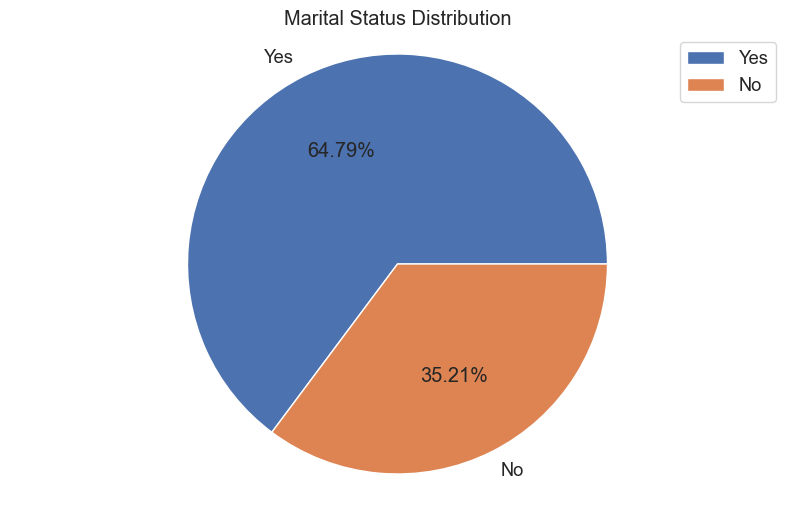

In [71]:
plt.pie(x=married_count.values, labels=married_count.index, autopct="%0.2f%%")

plt.title("Marital Status Distribution")
plt.axis("equal")  # Set the aspect ratio to make the pie circular
plt.legend(loc='best')

plt.show()

65% of the people in the dataset are married.

##### 8. Dependents:



In [72]:
df["Dependents"].unique() ## unique values in Dependents feature

array(['1', '0', '2', '3+'], dtype=object)

In [73]:
## Mapping values in the "Dependents" column to more descriptive labels

df["Dependents"] = df["Dependents"].map(
        {
            "0": "Zero",
            "1" : "One",
            "2" : "Two",
            "3+" : "Three or more"
        }
)

In [74]:
df["Dependents"].value_counts(normalize=True) 

Zero             0.570833
Two              0.177083
One              0.166667
Three or more    0.085417
Name: Dependents, dtype: float64

##### 9. Education: 

In [77]:
df["Education"].value_counts(normalize=True).to_frame()

,Education
Graduate,0.797917
Not Graduate,0.202083


              proportion
Graduate        0.797917
Not Graduate    0.202083
**************************************************


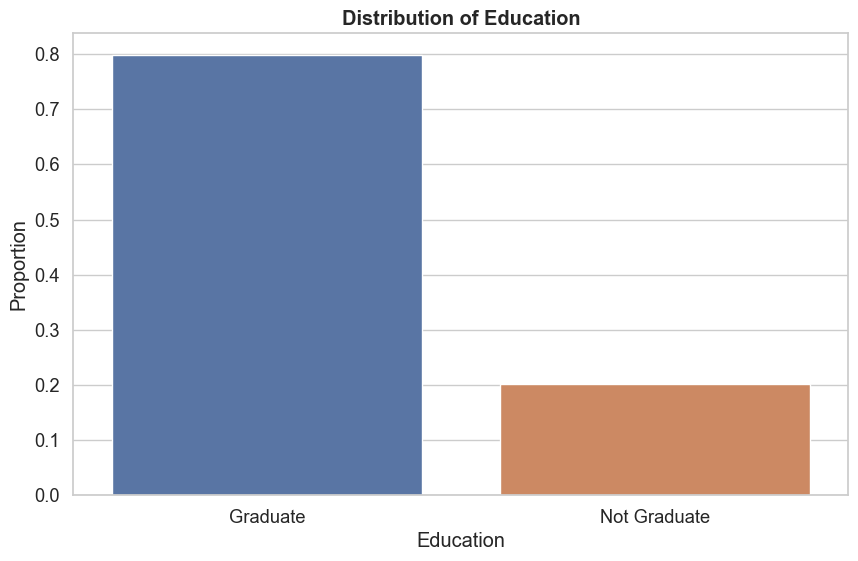

In [79]:
# Calculate the normalized value counts of "Education"

education_count = df["Education"].value_counts(normalize=True).to_frame(name="proportion")

print(education_count)
print("*"*50)

sns.barplot(x=education_count.index, y="proportion", data=education_count)

plt.xlabel("Education")
plt.ylabel("Proportion")
plt.title("Distribution of Education", weight="bold")

plt.show()

Most loan applicants are graduates

##### 10. Self Employed:

In [84]:
df["Self_Employed"].value_counts(normalize=True).to_frame(name = 'proportion')

,proportion
No,0.8625
Yes,0.1375


Most loan applicants are not self-employed.

##### 11. Property Area: 



In [85]:
property_count = df["Property_Area"].value_counts()
print(property_count)
print("*"*50)

Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64
**************************************************


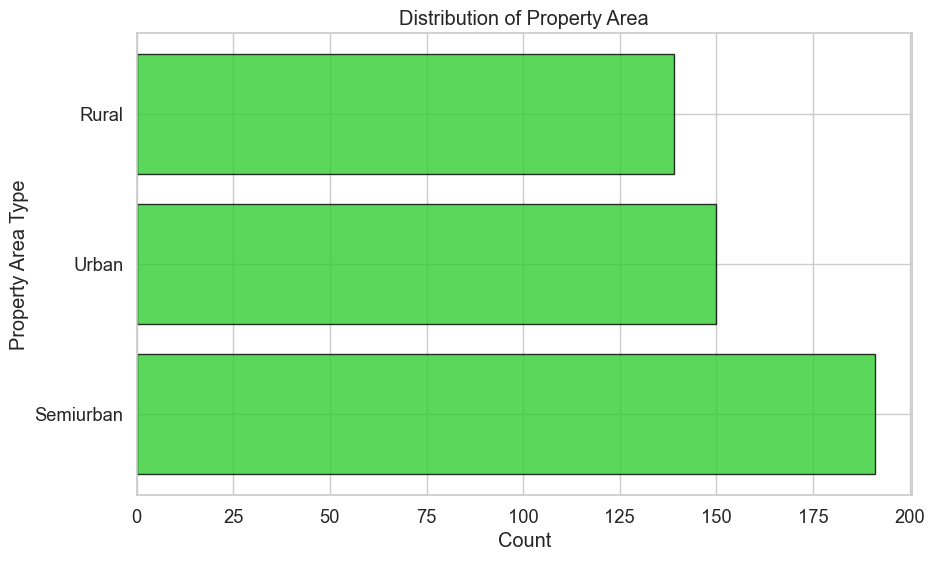

In [87]:
plt.barh(data = df, width = property_count.values, y = property_count.index, alpha = 0.8, edgecolor = 'black', color= '#32CD32')

plt.title('Distribution of Property Area')
plt.xlabel('Count')
plt.ylabel('Property Area Type')

plt.show()

Most of the loan applicants are from semi-urban areas.

##### 12. Loan Status:



In [88]:
loan_count = df["Loan_Status"].value_counts()
print(loan_count)
print("*"*50)

Y    332
N    148
Name: Loan_Status, dtype: int64
**************************************************


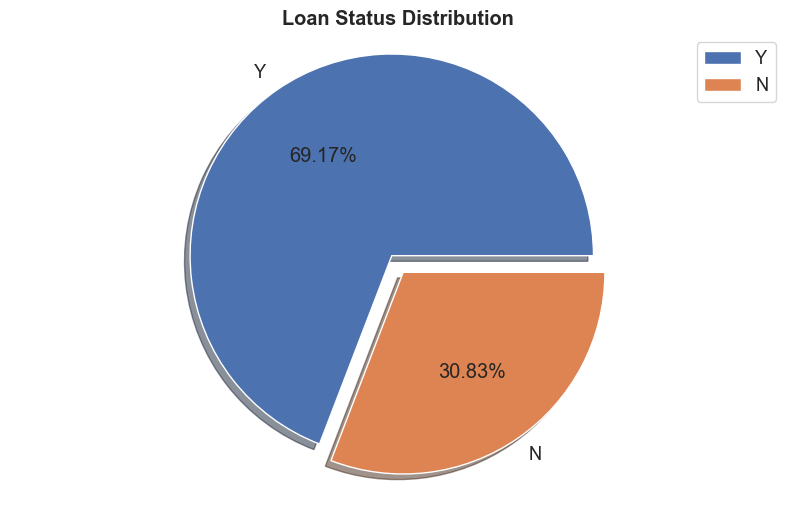

In [92]:
plt.pie(x=loan_count.values, labels=loan_count.index, autopct="%0.2f%%", shadow=True, explode=(0, 0.1))

plt.title("Loan Status Distribution", weight="bold")
plt.axis("equal")  
plt.legend(loc='best')

plt.show()

The target feature in this dataset represents the loan approval status, whether it is accepted or not. It is important to note that the classes in this target variable are imbalanced, meaning there is a significant difference in the number of instances between the accepted and non-accepted loan status.


### Exploratory Data Analysis: Bi-variate & Multi-variate Analysis

###### 1. Is there a relationship between the applicant's income and loan amount requested?

In [98]:
## ApplicantIncome and LoanAmount
print(f'The correlation between the Applicant Income and Loan Amount is = \
      {round(df[["ApplicantIncome" ,"LoanAmount"]].corr(),2).iloc[0,1]}')

The correlation between the Applicant Income and Loan Amount is =       0.5


There is a strong relationship between the applicant's income and the loan amount requested.

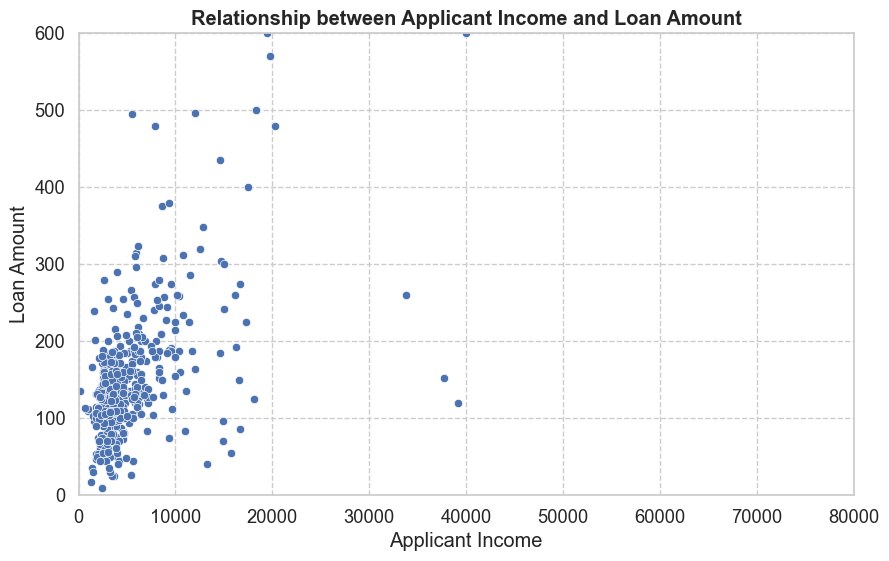

In [99]:
## Create a scatter plot
sns.scatterplot(data=df, x="ApplicantIncome", y="LoanAmount")

plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.title("Relationship between Applicant Income and Loan Amount", weight="bold")

plt.grid(True, linestyle="--")  # Add grid lines
plt.xlim(0, 80000)  # Set the x-axis limits
plt.ylim(0, 600)  # Set the y-axis limits

plt.show()

###### 2. Does the loan approval status vary based on the applicant's gender?


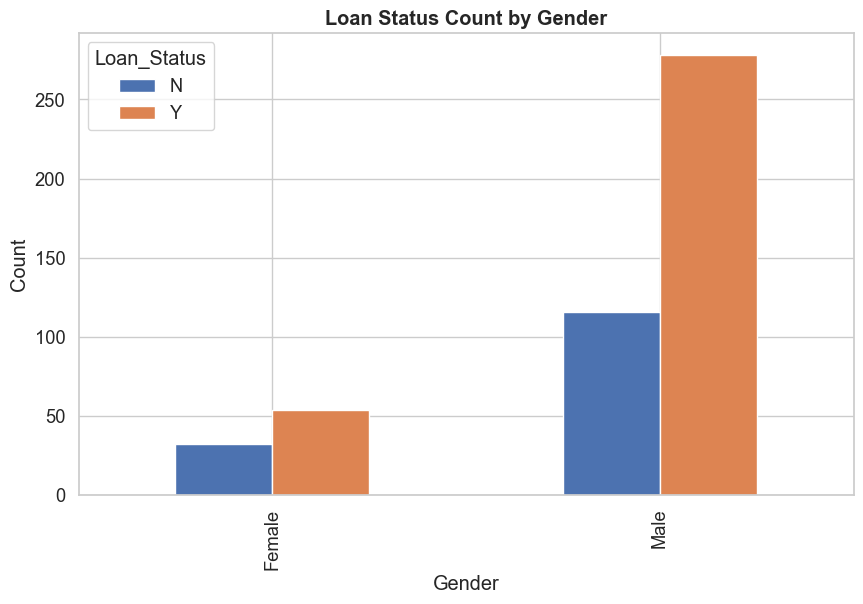

In [111]:
## Group the data by "Gender" and "Loan_Status" and calculate the count
loan_status_count = df.groupby(["Gender", "Loan_Status"])["Gender"].count().unstack()

loan_status_count.plot(kind="bar", stacked=False)

plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Loan Status Count by Gender", weight="bold")

plt.show()

In [104]:
print("The % of female rejected =",
      round((loan_status_count.iloc[0,0]) / (loan_status_count.iloc[0,:].sum(axis=0)),3)*100)
print("The % of male rejected =",
      round((loan_status_count.iloc[1,0]) / (loan_status_count.iloc[1,:].sum(axis=0)),3)*100)

The % of female rejected = 37.2
The % of male rejected = 29.4


There is no clear relationship between gender and loan status approval. However, the proportion of women whose loan applications are rejected is higher (37%) compared to men (30%).

###### 3. What is the distribution of loan approval status for different education levels?

In [106]:
df.groupby(["Education", "Loan_Status"])["Loan_Status"].count().to_frame()

Loan_Status
Education    Loan_Status             
Graduate     N                    112
             Y                    271
Not Graduate N                     36
             Y                     61

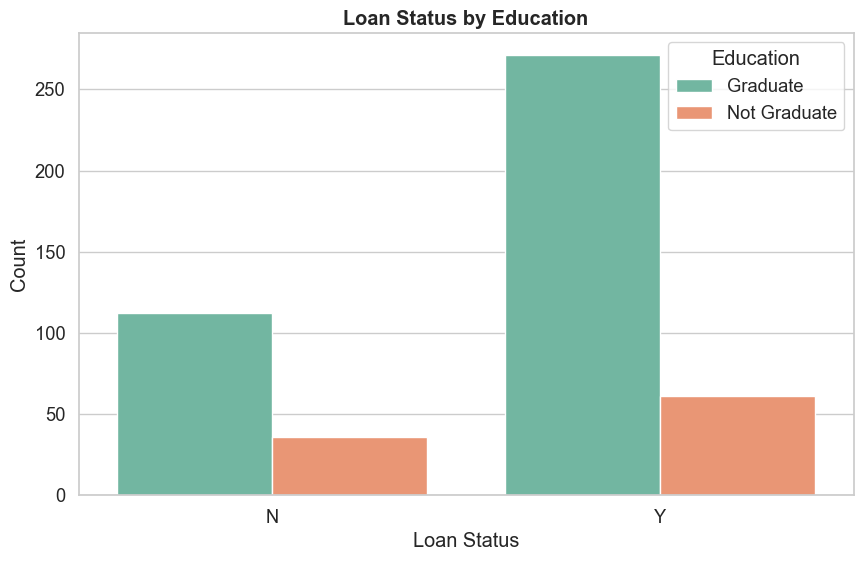

In [114]:
sns.countplot(data=df, x="Loan_Status", hue="Education", palette = 'Set2')

plt.xlabel("Loan Status")   
plt.ylabel("Count")        
plt.title("Loan Status by Education", weight="bold")  

plt.legend(title="Education", loc="upper right") 
plt.show()

###### 4.Is there a correlation between the applicant's credit history and loan approval status?

Loan_Status  Credit_History
N            No                 63
             Yes                85
Y            No                  7
             Yes               325
Name: Loan_Status, dtype: int64
**************************************************


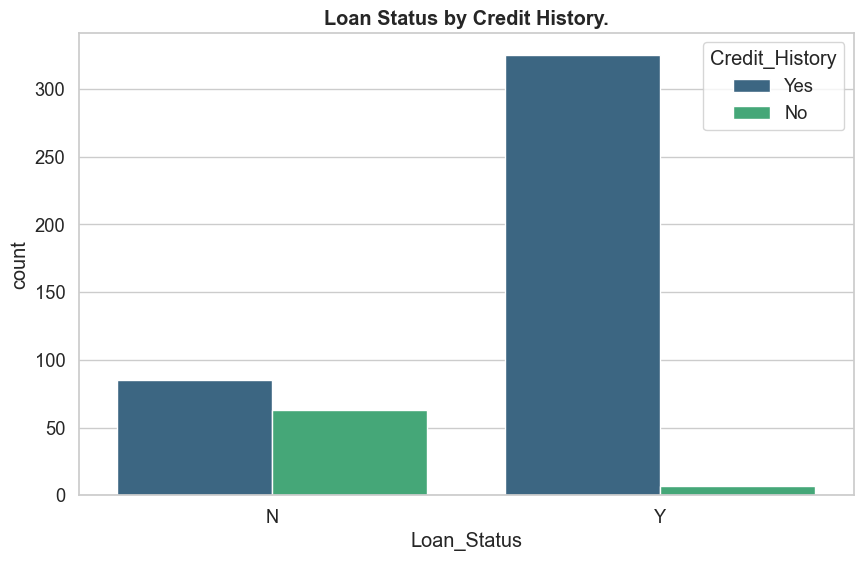

In [109]:
print(df.groupby(["Loan_Status", "Credit_History"])["Loan_Status"].count())
print("*"*50)

sns.countplot(data=df, x="Loan_Status", hue="Credit_History", palette = 'viridis')

plt.title("Loan Status by Credit History.", weight="bold")
plt.show()

Mostly, anyone with a credit history of 1 (Yes) will be accepted

###### 5.How does the loan approval status differ for married and unmarried applicants?

In [115]:
loan_status_married = df.groupby(["Loan_Status", "Married"])["Married"].count().unstack()
loan_status_married

Married,No,Yes
Loan_Status,,
N,64,84
Y,105,227


In [120]:
print("The ratio of Non-married rejected".title(),
      round((loan_status_married.iloc[0,0]) / (loan_status_married.iloc[0,:].sum(axis=0)),2)*100)
print("The ratio of married rejected".title(),
      round((loan_status_married.iloc[0,1]) / (loan_status_married.iloc[0,:].sum(axis=0))*100, 2))

The Ratio Of Non-Married Rejected 43.0
The Ratio Of Married Rejected 56.76


The percentage of single people whose loans are rejected is higher than the percentage of married people.

###### 6.  Does the loan amount vary based on the applicant's property area?

In [121]:
df.groupby("Property_Area")["LoanAmount"].agg(["sum","mean","count"]).sort_values(by="mean", ascending=False)

,sum,mean,count
Property_Area,,,
Rural,21634.0,155.640288,139
Semiurban,27897.0,146.057592,191
Urban,19942.0,132.946667,150


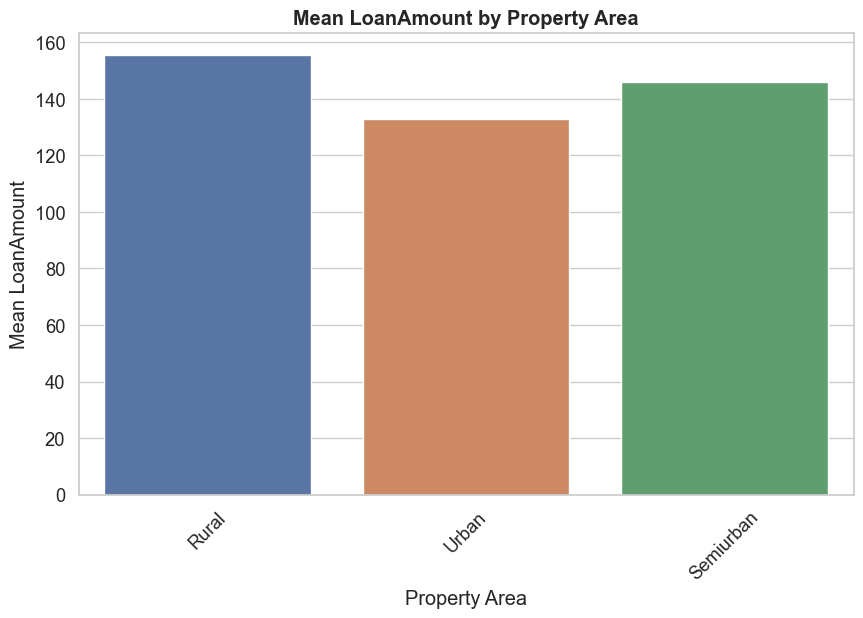

In [122]:
sns.barplot(data=df, x="Property_Area", y="LoanAmount", errorbar=None, estimator="mean")

plt.title("Mean LoanAmount by Property Area", weight="bold")
plt.xlabel("Property Area")
plt.ylabel("Mean LoanAmount")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

The average Loan Amount in the "Rural" area is higher than in the other areas.

###### 7.Is there a relationship between the applicant's dependents and loan approval status?

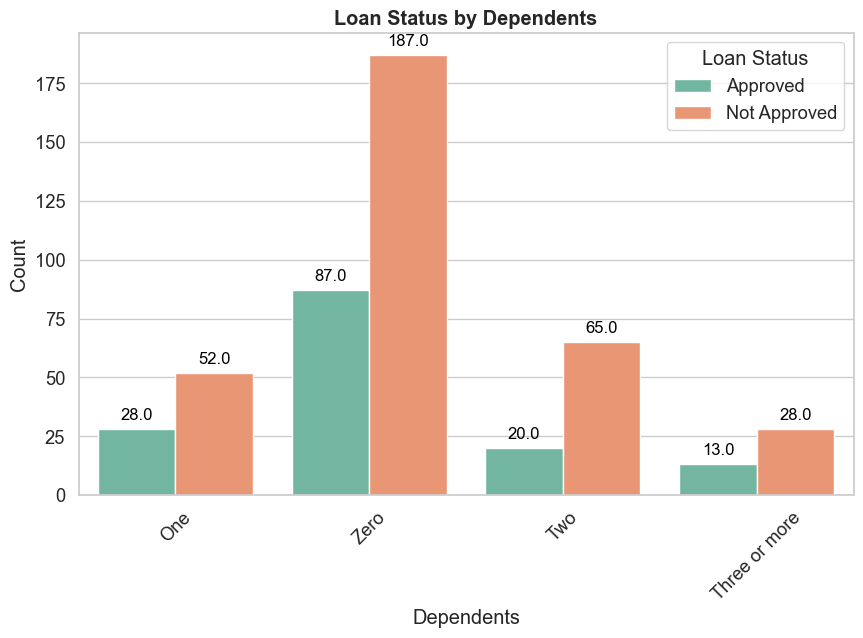

In [129]:
ax = sns.countplot(data=df, x="Dependents", hue="Loan_Status", palette = 'Set2')

ax.set_title("Loan Status by Dependents", weight="bold")
ax.set_xlabel("Dependents")
ax.set_ylabel("Count")
ax.legend(title="Loan Status", labels=["Approved", "Not Approved"])  ## legend labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotate x-axis labels 

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.show()

For most loan applicants, the number of dependents is 0.
The highest percentage of approved loans are for customers with no dependents.

###### 8. What is the distribution of loan approval status for different employment types?

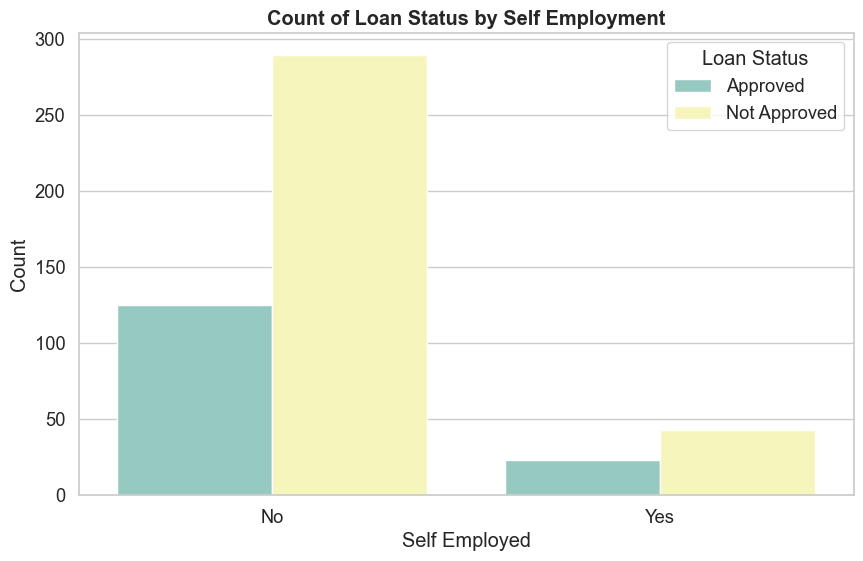

In [133]:
countplot = sns.countplot(data=df, x="Self_Employed", hue="Loan_Status", palette = 'Set3')  

countplot.set(xlabel="Self Employed", ylabel="Count")
plt.title("Count of Loan Status by Self Employment", weight="bold")

legend = countplot.get_legend()
legend.set_title("Loan Status")
for t, l in zip(legend.texts, ["Approved", "Not Approved"]):  
    t.set_text(l)

plt.show()

###### 9. Is there a correlation between the loan amount and the applicant's loan repayment term?

Correlation between Loan Amount and Loan Amount Term = 0.05


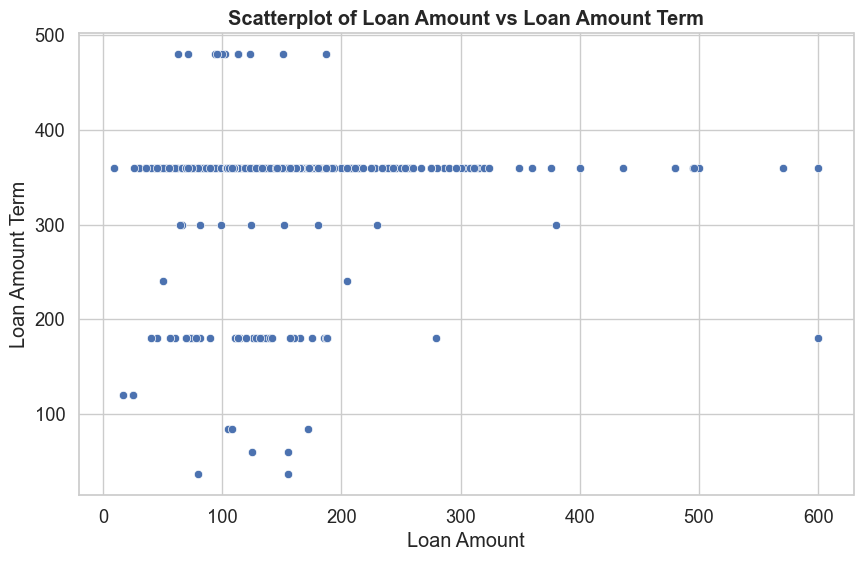

In [134]:
correlation = df[["LoanAmount", "Loan_Amount_Term"]].corr().iloc[0, 1]

print("Correlation between Loan Amount and Loan Amount Term = {:.2f}".format(correlation))

# Create a scatterplot
sns.scatterplot(data=df, x="LoanAmount", y="Loan_Amount_Term")

plt.xlabel("Loan Amount")
plt.ylabel("Loan Amount Term")
plt.title("Scatterplot of Loan Amount vs Loan Amount Term", weight="bold")

plt.show()

There is no relationship between the loan amount and the number of repayment months

###### 10. Pair Plot by Loan Status


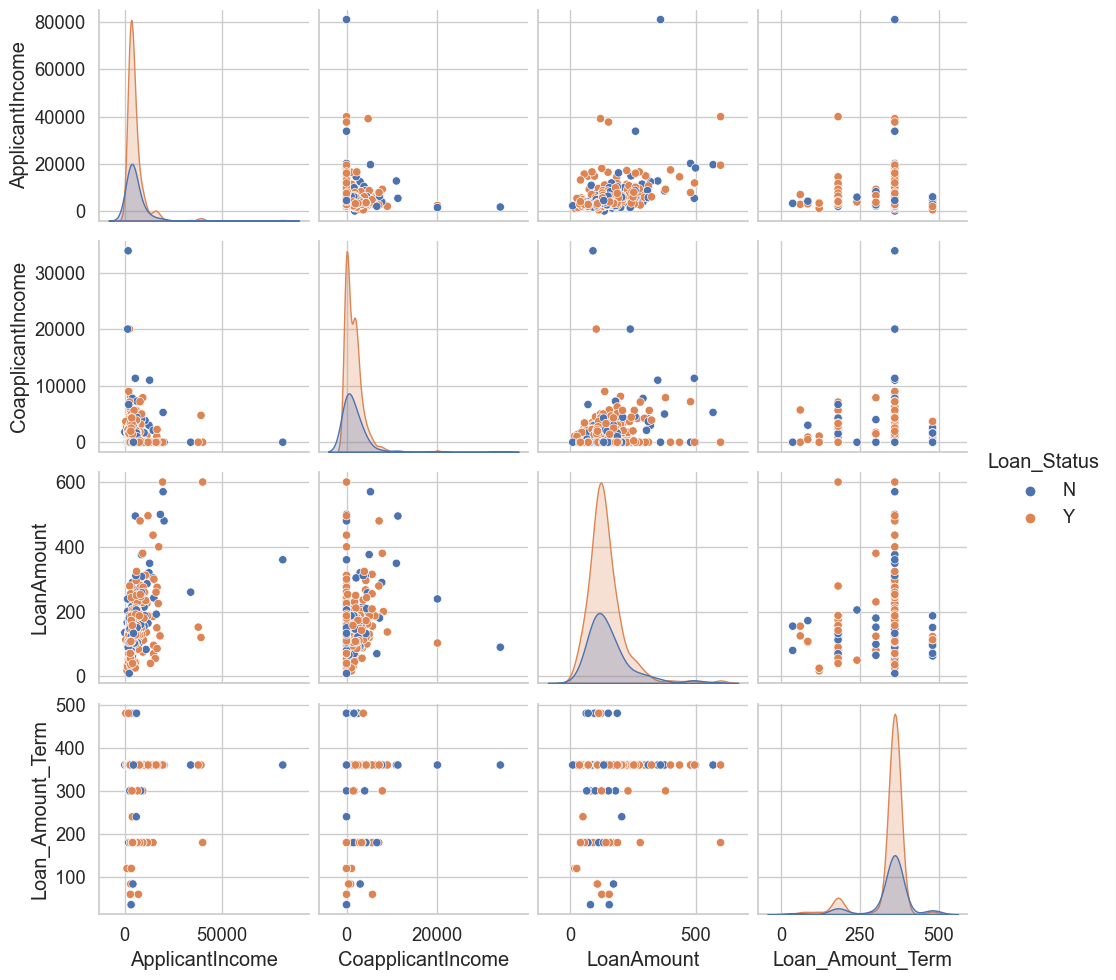

In [135]:
sns.pairplot(data=df, hue="Loan_Status")
plt.show()

###### 11. Correlation between Numerical columns

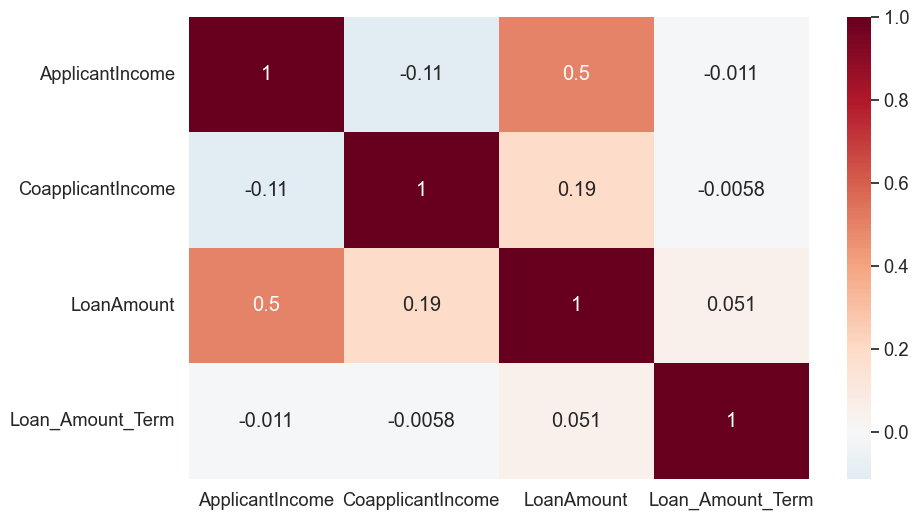

In [136]:
Numerical_cols = df.select_dtypes(include="number").columns.to_list() 

correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap="RdBu_r", center=0)

plt.show()

###### 12. Correlation between Loan Amount and ApplicantIncome by Loan Status.¶

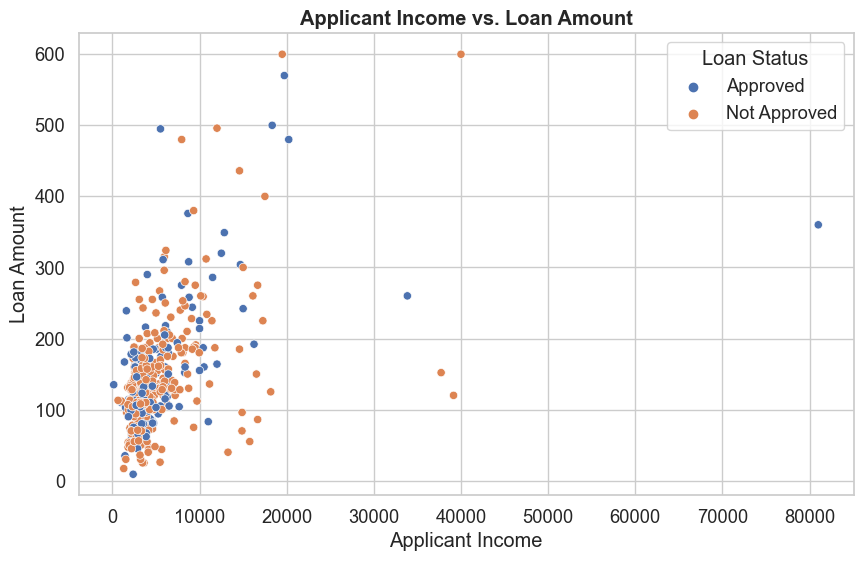

In [137]:
scatterplot = sns.scatterplot(data=df, x="ApplicantIncome", y="LoanAmount", hue="Loan_Status")

plt.title("Applicant Income vs. Loan Amount", weight="bold")
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")

scatterplot.legend(title="Loan Status")
legend_labels = ["Approved", "Not Approved"]  # Custom legend labels
for t, l in zip(scatterplot.get_legend().texts, legend_labels):
    t.set_text(l)

plt.show()

In [139]:
data = df.copy()

### Feature Engineering: 

In [140]:
data["TotalIncome"] = data["ApplicantIncome"] + data["CoapplicantIncome"] 

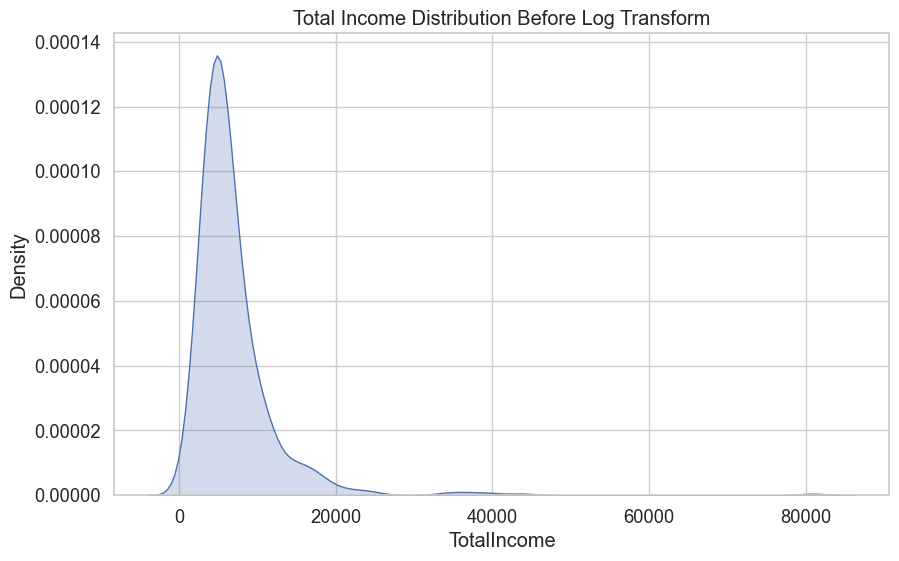

In [141]:
sns.kdeplot(data=data, x="TotalIncome", fill=True)
plt.title("Total Income Distribution before log transform".title())
plt.show()

In [143]:
data["EMI"] = data["LoanAmount"] / data["Loan_Amount_Term"]
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,EMI
1,LP001003,Male,Yes,One,Graduate,No,4583,1508.0,128.0,360.0,Yes,Rural,N,6091.0,0.355556
2,LP001005,Male,Yes,Zero,Graduate,Yes,3000,0.0,66.0,360.0,Yes,Urban,Y,3000.0,0.183333
3,LP001006,Male,Yes,Zero,Not Graduate,No,2583,2358.0,120.0,360.0,Yes,Urban,Y,4941.0,0.333333
4,LP001008,Male,No,Zero,Graduate,No,6000,0.0,141.0,360.0,Yes,Urban,Y,6000.0,0.391667
5,LP001011,Male,Yes,Two,Graduate,Yes,5417,4196.0,267.0,360.0,Yes,Urban,Y,9613.0,0.741667
